In [1]:
import os

# List all files in the dataset directory
base_path = '/kaggle/input/cleanedtabularcsv/cleaned_train.csv'

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the training data
train = pd.read_csv(base_path)
train.head(5)

,id,Basic_Demos-Age,Basic_Demos-Sex,age_group,CGAS_Score,Physical-BMI,BIA_Activity_Level,Fitness_Combined_Score,Physical_Composite_Index,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,5,0,Child,51.000000,16.877316,2.0,0.200000,0.184805,64.4,3.0,2.0
1,000fd460,9,0,Early Teen,65.156829,14.035590,2.0,0.400000,0.178587,64.0,0.0,0.0
2,00105258,10,1,Early Teen,65.156829,19.131648,3.0,0.583126,0.193319,54.0,2.0,0.0
3,00115b9f,9,0,Early Teen,71.000000,18.292347,3.0,0.400000,0.190185,45.0,0.0,1.0
4,001f3379,13,1,Teen,50.000000,22.279952,2.0,0.400000,0.217322,56.0,0.0,1.0


In [2]:
# Drop a column by its name
train.drop(['age_group','id'], axis=1, inplace=True)

In [3]:
correlation_matrix = train.corr()
correlation_matrix

,Basic_Demos-Age,Basic_Demos-Sex,CGAS_Score,Physical-BMI,BIA_Activity_Level,Fitness_Combined_Score,Physical_Composite_Index,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
Basic_Demos-Age,1.000000,0.051229,-0.029053,0.474882,0.120009,-0.138492,0.308388,0.023892,0.437812,0.366290
Basic_Demos-Sex,0.051229,1.000000,0.092890,0.019980,-0.058695,0.057258,0.022087,-0.013311,-0.008187,-0.100743
CGAS_Score,-0.029053,0.092890,1.000000,-0.074201,0.043764,0.075232,-0.056137,-0.128933,-0.098636,-0.078660
Physical-BMI,0.474882,0.019980,-0.074201,1.000000,0.087225,-0.150247,0.490989,0.068604,0.296181,0.210449
BIA_Activity_Level,0.120009,-0.058695,0.043764,0.087225,1.000000,0.362169,-0.005036,-0.017993,0.012291,0.056299
Fitness_Combined_Score,-0.138492,0.057258,0.075232,-0.150247,0.362169,1.000000,-0.107525,-0.002418,-0.114181,-0.050159
Physical_Composite_Index,0.308388,0.022087,-0.056137,0.490989,-0.005036,-0.107525,1.000000,0.033919,0.163676,0.129886
SDS-SDS_Total_T,0.023892,-0.013311,-0.128933,0.068604,-0.017993,-0.002418,0.033919,1.000000,0.080753,0.240279
PreInt_EduHx-computerinternet_hoursday,0.437812,-0.008187,-0.098636,0.296181,0.012291,-0.114181,0.163676,0.080753,1.000000,0.338435
sii,0.366290,-0.100743,-0.078660,0.210449,0.056299,-0.050159,0.129886,0.240279,0.338435,1.000000


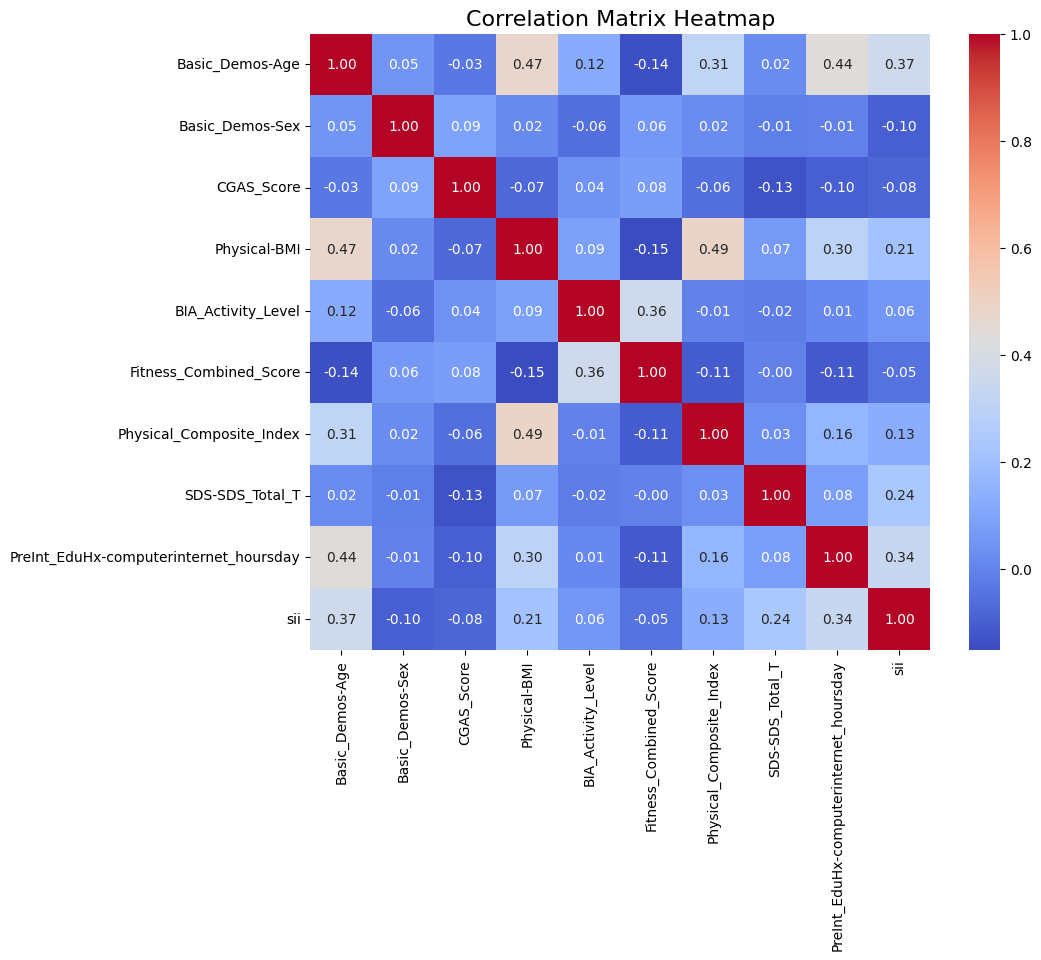

In [4]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

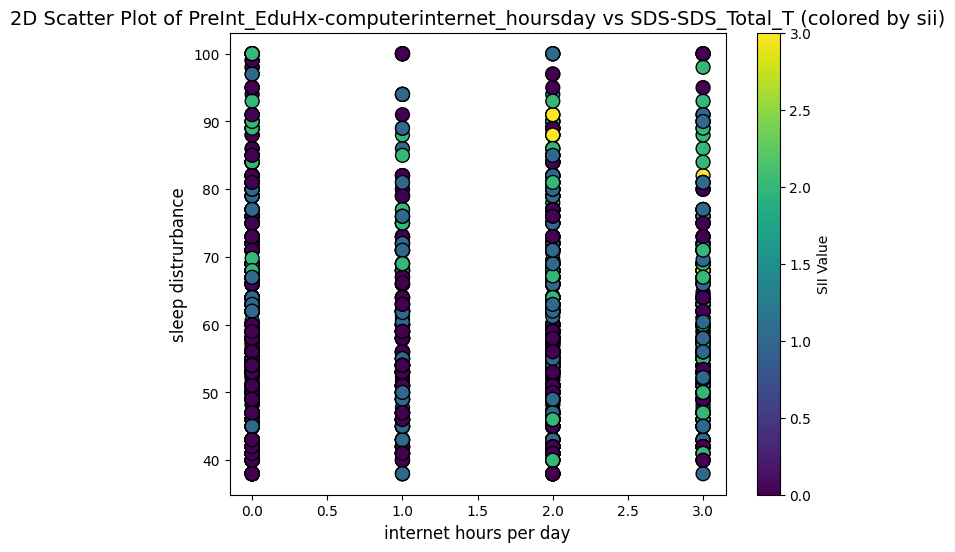

In [5]:
# Plot the scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(train['PreInt_EduHx-computerinternet_hoursday'], train['SDS-SDS_Total_T'], c=train['sii'], cmap="viridis", s=100, edgecolor="k")
plt.xlabel('internet hours per day', fontsize=12)
plt.ylabel('sleep distrurbance', fontsize=12)
plt.title(f"2D Scatter Plot of PreInt_EduHx-computerinternet_hoursday vs SDS-SDS_Total_T (colored by sii)", fontsize=14)
plt.colorbar(scatter, label=f"SII Value")
plt.show()

In [6]:
# Ensure the required columns are present in the dataset
x_feature = "PreInt_EduHx-computerinternet_hoursday"
y_feature = "SDS-SDS_Total_T"
z_feature = "Basic_Demos-Age"
target = "sii"

/tmp/ipykernel_17/3212566506.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("tab10", num_colors)  # Use a discrete colormap


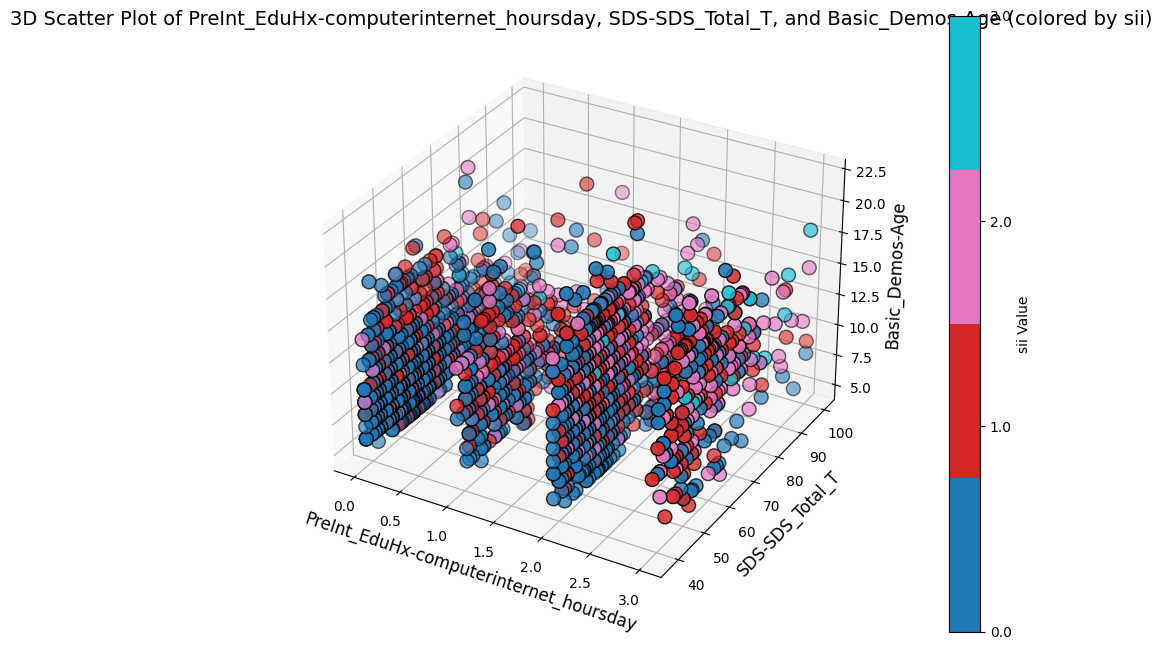

In [7]:
from matplotlib import cm
# Create a discrete colormap
unique_sii_values = sorted(train[target].unique())  # Unique sii values
num_colors = len(unique_sii_values)
cmap = cm.get_cmap("tab10", num_colors)  # Use a discrete colormap

# Map sii values to indices for coloring
color_indices = [unique_sii_values.index(value) for value in train[target]]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    train[x_feature], 
    train[y_feature], 
    train[z_feature], 
    c=color_indices,  # Use mapped indices for colors
    cmap=cmap, 
    s=100, 
    edgecolor="k"
)

# Label the axes
ax.set_xlabel(x_feature, fontsize=12)
ax.set_ylabel(y_feature, fontsize=12)
ax.set_zlabel(z_feature, fontsize=12)
ax.set_title(f"3D Scatter Plot of {x_feature}, {y_feature}, and {z_feature} (colored by {target})", fontsize=14)

# Add color bar with sii labels
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_ticks(range(num_colors))
cbar.set_ticklabels(unique_sii_values)  # Map ticks to sii values
cbar.set_label(f"{target} Value")

# Show plot
plt.show()

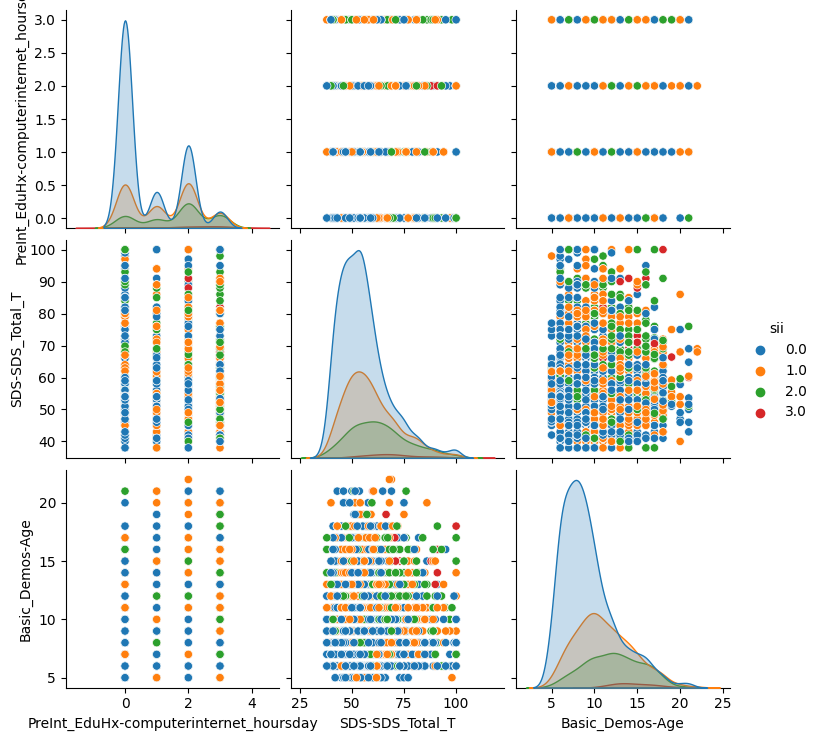

In [8]:
import seaborn as sns
import pandas as pd

# Select relevant columns
features = ["PreInt_EduHx-computerinternet_hoursday", "SDS-SDS_Total_T", "Basic_Demos-Age", "sii"]

# Create the pairplot with hue based on the 'sii' classes
sns.pairplot(train[features], hue="sii", palette="tab10")
plt.show()


A pairplot (scatterplot matrix) visualizes the pairwise relationships between all features. It can help identify which features have a better chance of separating the classes based on their pairwise relationships

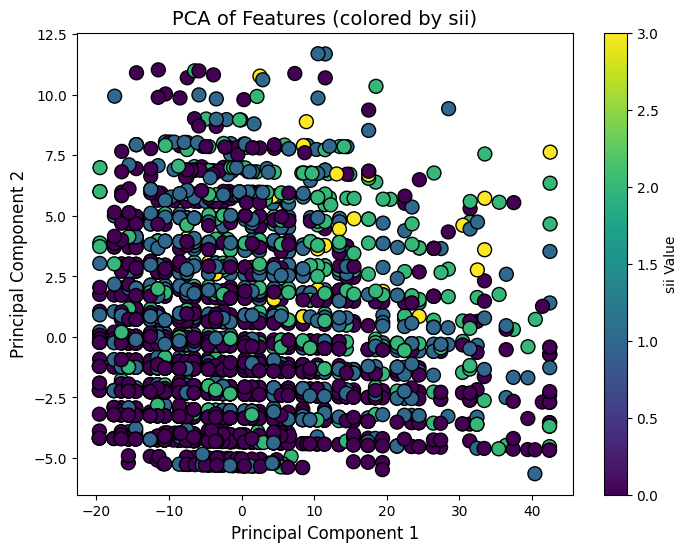

In [9]:
from sklearn.decomposition import PCA
# Select features (excluding the target 'sii')
features = ["PreInt_EduHx-computerinternet_hoursday", "SDS-SDS_Total_T", "Basic_Demos-Age"]
X = train[features]

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train["sii"], cmap="viridis", s=100, edgecolor="k")
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title("PCA of Features (colored by sii)", fontsize=14)
plt.colorbar(scatter, label="sii Value")
plt.show()

If the feature space is high-dimensional (more than 3 features), it might be difficult to visualize directly. PCA can reduce the dimensionality and map the data to 2 or 3 dimensions. This can help uncover any hidden structures or separations between the classes.
PCA reduces the dimensionality of your data and projects it into a 2D space.
You can visualize how well the classes (sii) are separated in this new lower-dimensional space.
If there is clear separation in the PCA plot, it may indicate that linear models can work well. If not, you may need to consider nonlinear models.

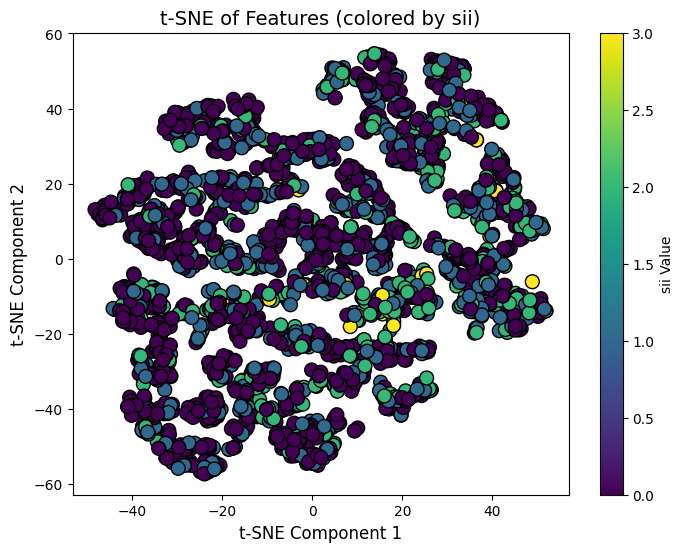

In [10]:
from sklearn.manifold import TSNE
# Select features (excluding the target 'sii')
# Drop the target variable 'sii' and any non-numeric columns if necessary
features = train.drop(columns=["sii"])  # Exclude 'sii' and 'id' (non-numeric columns)

# Perform t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(features)

# Plot the t-SNE results, coloring the points by 'sii'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=train.loc[features.index, "sii"], cmap="viridis", s=100, edgecolor="k")
plt.xlabel("t-SNE Component 1", fontsize=12)
plt.ylabel("t-SNE Component 2", fontsize=12)
plt.title("t-SNE of Features (colored by sii)", fontsize=14)
plt.colorbar(scatter, label="sii Value")
plt.show()

In [11]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.3 MB/s eta 0:00:00


/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


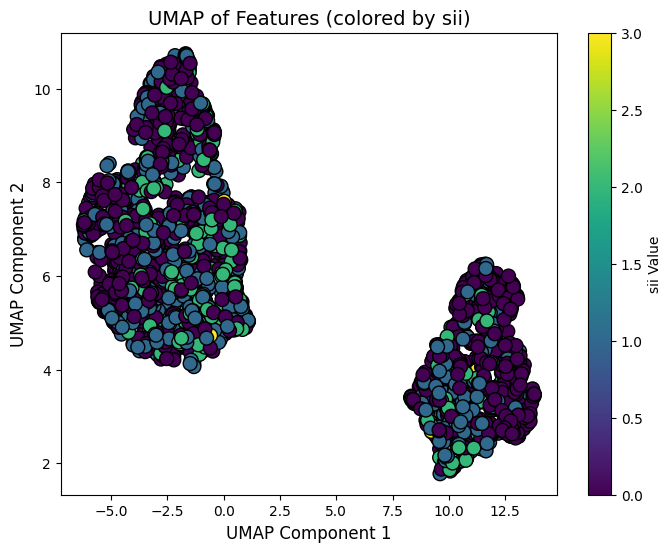

In [12]:
from sklearn.preprocessing import StandardScaler
import umap
features = train.drop(columns=["sii"])  # Exclude 'sii' and 'id'

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(scaled_features)

# Plot the UMAP results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=train["sii"], cmap="viridis", s=100, edgecolor="k")
plt.xlabel("UMAP Component 1", fontsize=12)
plt.ylabel("UMAP Component 2", fontsize=12)
plt.title("UMAP of Features (colored by sii)", fontsize=14)
plt.colorbar(scatter, label="sii Value")
plt.show()